# Graph Neural Networks



Today we will have a hands-on with Graph Neural Networks and PyG,
a popular library for Graph Neural Networks (GNNs).

In this notebook, you will explore:
- What does a graph dataset look like?
- Experience with GCNs and GATs
- Observe oversmoothing phenomenon in GNNs

## 1. Knowing PyG and the dataset
PyG is a library that is built on top of PyTorch and provides a set of tools to work with graph neural networks.

In [1]:
import torch_geometric

print(torch_geometric.__version__)

2.6.1


As you may have learnt from discrete mathematics, a graph is a collection of nodes $V$ and edges $E$.

Let us observe how PyG expresses a graph.

Have you ever purchased a product online?
You may sometimes notice that some products are usually purchased together.
This could be a good cue for a recommendation system.

The `Amazon` dataset integrated in PyG is a collection of products as nodes, and edges mean that two products are usually purchased together. The feature of each node is the product review text.

> _"The Amazon Computers and Amazon Photo networks from the “Pitfalls of Graph Neural Network Evaluation” paper. Nodes represent goods and edges represent that two goods are frequently bought together. Given product reviews as bag-of-words node features, the task is to map goods to their respective product category."_
>
> -- PyG [Amazon](https://pytorch-geometric.readthedocs.io/en/2.6.1/generated/torch_geometric.datasets.Amazon.html#torch_geometric.datasets.Amazon) documentation

Let's take a look at the Amazon computers dataset.

In [2]:
# Load the dataset
import torch_geometric.datasets

dataset = torch_geometric.datasets.Amazon(
    root="data/Amazon",
    name="Computers",
)

In [3]:
data = dataset[0] # The dataset contains only one graph

In [4]:
# Take a look at the data shape
print(f"Number of nodes: {data.num_nodes}")
print(f"Number of edges: {data.num_edges}")
print(f"Number of node features: {data.num_node_features}")
print(f"Number of edge features: {data.num_edge_features}")
print(f"Number of classes: {dataset.num_classes}")

Number of nodes: 13752
Number of edges: 491722
Number of node features: 767
Number of edge features: 0
Number of classes: 10


In PyG, the node features are accessed through the `x` attribute, and the edges are accessed through the `edge_index` attribute.

In [5]:
print(f"Node feature shape: {data.x.shape}")
print(f"Edge index shape: {data.edge_index.shape}")

Node feature shape: torch.Size([13752, 767])
Edge index shape: torch.Size([2, 491722])


In [ ]:
# Get one edge index to have a look
print(f"Edge index: {data.edge_index[:, 0]}")

Edge index: tensor([  0, 507])


It is sometimes troublesome to inspect a graph with index numbers.
An interesting package usually used for visualizing a graph is `networkx`.

It works well with PyG. (Actually PyG provides a utility function called `to_networkx` to convert a PyG graph to a networkx graph.)

In [30]:
import networkx as nx
import torch_geometric.utils
import matplotlib.pyplot as plt
import numpy as np
import torch
import random

def visualize_subgraph_largest_cc(data, num_nodes=100, seed=42):
    """
    Sample a subgraph from the original graph and visualize the largest connected component.
    
    Args:
        data: PyTorch Geometric Data object
        num_nodes: Number of nodes to include in the subgraph
        seed: Random seed for reproducibility
    """
    # Set random seeds for reproducibility
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    
    # Convert to NetworkX graph
    g = torch_geometric.utils.to_networkx(data, to_undirected=True)
    
    # Get total number of nodes
    total_nodes = g.number_of_nodes()
    print(f"Total nodes in graph: {total_nodes}")
    print(f"Total edges in graph: {g.number_of_edges()}")
    
    # Ensure we don't sample more nodes than available
    num_nodes = min(num_nodes, total_nodes)
    
    # Sample random nodes
    sampled_nodes = random.sample(list(g.nodes()), num_nodes)
    
    # Extract the subgraph
    subgraph = g.subgraph(sampled_nodes)
    
    # Further reduce by keeping only the largest connected component
    largest_cc = max(nx.connected_components(subgraph), key=len)
    largest_cc_subgraph = g.subgraph(largest_cc)
    
    print(f"Sampled subgraph has {largest_cc_subgraph.number_of_nodes()} nodes and {largest_cc_subgraph.number_of_edges()} edges")
    
    # Create figure with a decent size
    plt.figure(figsize=(5, 4))
    
    # Use a more sophisticated layout for better visualization
    pos = nx.spring_layout(largest_cc_subgraph, seed=seed)
    
    # Draw the graph with customized appearance
    nx.draw_networkx(
        largest_cc_subgraph,
        pos=pos,
        node_size=50,
        alpha=0.8,
        with_labels=True,
        font_color='gray'
    )
    
    plt.title(f"Amazon Dataset - Sample of {largest_cc_subgraph.number_of_nodes()} nodes")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

Total nodes in graph: 13752
Total edges in graph: 245861
Sampled subgraph has 16 nodes and 18 edges


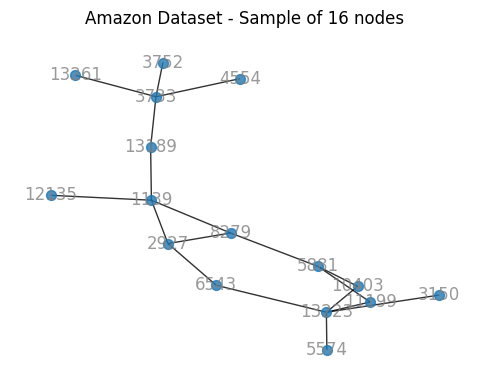

In [31]:
visualize_subgraph_largest_cc(data, num_nodes=200)